# **Layer 1: Start**

## 1. Data

1.1 Loading libraries for data creation for clustering and spliting in train-test


In [0]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

1.2 Genearating data using make_blob for bi-centered cluster data

In [0]:
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=5.5, center_box=(-8.0, 8.0), shuffle=True, random_state=10) #200, 4.5

1.3 Visualizing the generated cluster data having 2 features

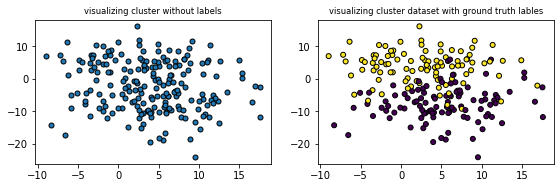

In [0]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("visualizing cluster without labels", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=None,
            s=25, edgecolor='k')
plt.subplot(322)
plt.title("visualizing cluster dataset with ground truth lables", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

1.4 Spliting generated cluter data into trainset and testset with 7:3 ratio

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

1.5 Verifying the sizes of trainset and testset (no. of records and no. of features)

In [0]:
print ("Trainset - Rows x Features is", X_train.shape)

Trainset - Rows x Features is (140, 2)


In [0]:
print ("Testset Rows x Features is", X_test.shape)

Testset Rows x Features is (60, 2)


## 2. Machine Learning Model - Chosing K- means for learning clusters on data

2.1 Importing K-means for cluster analysis

In [0]:
from sklearn.cluster import KMeans

2.2 Defining K Means model - no. of clusters, maxium iteration, tolerance, etc.

In [0]:
modelKM = KMeans(n_clusters=2, init='random',precompute_distances='auto', n_init=2, max_iter=2, tol=1e-04, random_state=10)

2.3 Viewing KMeans model properties

In [0]:
vars(modelKM) 

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'random',
 'max_iter': 2,
 'n_clusters': 2,
 'n_init': 2,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': 10,
 'tol': 0.0001,
 'verbose': 0}

2.4 Viewing directory strcuture of KMeans model

In [0]:
#dir(modelKM)

## 3. Training Model on Data 

3.1 Training the K Means clustering model by fitting the trainset data

In [0]:
modelKM.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=2, n_clusters=2,
       n_init=2, n_jobs=None, precompute_distances='auto', random_state=10,
       tol=0.0001, verbose=0)

3.2 Viewing distance computing method and interia for leanred KMeans model

In [0]:
 print(modelKM.precompute_distances, modelKM.inertia_)

auto 6185.685854845488


## 4. Metrics & Error Measures

4.1 Importing matplotlib for curve visualization

In [0]:
from sklearn import metrics

4.2 Performing predcition on trainset by trained model



In [0]:
y_train_pred = modelKM.predict(X_train)

4.3 Visualizing ROC Curve of trained model on trainset

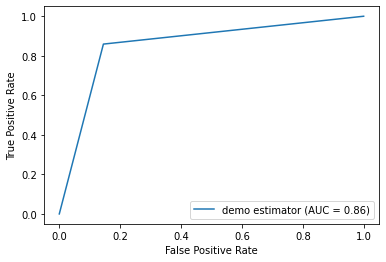

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='demo estimator')
display.plot()
plt.show()



4.4 Calculating the accuracy on trainset

In [0]:
print("Accuracy on trainset: ",metrics.accuracy_score(y_train, y_train_pred))

Accuracy on trainset:  0.8571428571428571


4.5 Viewing confusion matirx on trainset

In [0]:
print (metrics.confusion_matrix(y_train, y_train_pred))

[[59 10]
 [10 61]]


4.6 Viewing homogeneity score on trainset

In [0]:
from sklearn.metrics.cluster import homogeneity_score
print('Homogeneity score: ', homogeneity_score(y_train, y_train_pred))


Homogeneity score:  0.4082646454308449


4.7 Perceptual comparision on predicted vs. ground truth data points

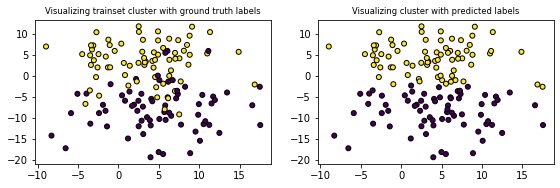

In [0]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("Visualizing trainset cluster with ground truth labels", fontsize='small')
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,
            s=25, edgecolor='k')

plt.subplot(322)
plt.title("Visualizing cluster with predicted labels", fontsize='small')
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train_pred,
            s=25, edgecolor='k')

## 5. Fine Tuning - Hyperparameters/other model

5.1 Evaluating primerly trained model on testset data

In [0]:
y_pred = modelKM.predict(X_test)
print("Accuracy on testset: ",metrics.accuracy_score(y_test, y_pred))

Accuracy on testset:  0.85




5.2 Performing Tuning - simply allowing model to converge more than before by increasing iterations from 2 to 4

In [0]:
modelKM = KMeans(n_clusters=2, init='random',precompute_distances='auto', n_init=2, max_iter=4, tol=1e-04, random_state=10)
modelKM.fit(X_train)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=4, n_clusters=2,
       n_init=2, n_jobs=None, precompute_distances='auto', random_state=10,
       tol=0.0001, verbose=0)

5.3 Calculating the accuracy on trainset after retraining the model

In [0]:
y_train_pred = modelKM.predict(X_train)
print("Accuracy on traindata (after fine-tuning): ",metrics.accuracy_score(y_train, y_train_pred))

Accuracy on traindata (after fine-tuning):  0.8642857142857143


5.4 Evaluating accuracy on testdata after retraining the model

In [0]:
y_pred = modelKM.predict(X_test)
print("Accuracy on testdata (after fine-tuning): ",metrics.accuracy_score(y_test, y_pred))

Accuracy on testdata (after fine-tuning):  0.8666666666666667


## 6 Prediction

6.1 Visualizing ROC Curve (Area under curve) on testset

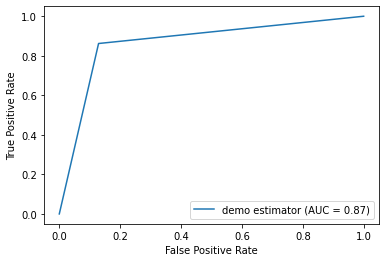

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='demo estimator')
display.plot()
plt.show()


6.2 Viewing confusion matirx on trainset

In [0]:
print (metrics.confusion_matrix(y_test, y_pred))

[[27  4]
 [ 4 25]]


6.3 Evalauting Homegeneity score on testset

In [0]:
print('Homogeneity score on testset: ', homogeneity_score(y_test, y_pred))

Homogeneity score on testset:  0.4331594750781506


6.4 Perceptual comparision on predicted vs. ground truth data points - test set

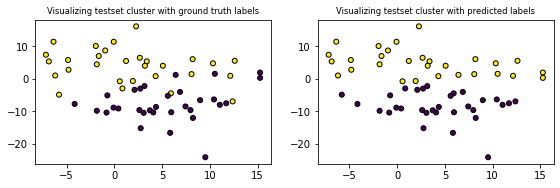

In [0]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("Visualizing testset cluster with ground truth labels", fontsize='small')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test,
            s=25, edgecolor='k')

plt.subplot(322)
plt.title("Visualizing testset cluster with predicted labels", fontsize='small')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred,
            s=25, edgecolor='k')

# **Layer 1: End**